# Druga verzija

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt

In [2]:
df = pd.read_csv('bank-additional.csv', sep = ';')
data = df
pd.set_option('display.max_columns', 100)          #Da se prikazu sve kolone
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
#Izbacimo sve redove sa null vrednostima. Ima ih svega 21 i sporadicno su rasporedjene, tako da ovo nece znacajno uticati na predikcije


df.isnull().sum() #Provera null vrednosti

df = df.dropna()  #Izbacivanje null vrednosti

df.isnull().sum()   #Provera

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
#Provera prisustva 'unknown' vrednosti. Stvar je u tome

df.isin(['unknown']).sum()

#Bez obzira da li stavimo & ili | isti je rezultat stoga sledi da gde se unknown pojavi u loan pojavi se iskljucivo i u housing

df[(df['loan']=='unknown') & (df['housing'] == 'unknown')].count() 




age               103
job               103
marital           103
education         103
default           103
housing           103
loan              103
contact           103
month             103
day_of_week       103
duration          103
campaign          103
pdays             103
previous          103
poutcome          103
emp.var.rate      103
cons.price.idx    103
cons.conf.idx     103
euribor3m         103
nr.employed       103
y                 103
dtype: int64

In [5]:
#Obzirom da ima samo 103 slucaja kada nam se to pojavljuje mozemo izbaciti te redove bez narocitih posledica po predikcije

df = df[df.housing != 'unknown']

#Izbacujemo i unknown redove u marital jer ih ima samo 11
df = df[df.marital != 'unknown']

df.isin(['unknown']).sum()

age                 0
job                38
marital             0
education         164
default           770
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [6]:
#U koloni default i education 'unknown' je znacajna vrednost (pogotovo u odnosu na broj instanci atributa) tako da bismo to mogli pretvoriti u num vrednost neku

# Job planiramo da sibnemo u get_dummies pa ako ih je mnogo malo u odnosu na druge atribute onda cemo videti da li da izbacujemo, sada necemo

## Prebacivanje kategorickih u num vrednosti

In [7]:
#Education pretvaramo u num:

df['education'] = df['education'].map({"unknown":0,"illiterate" : 1, "basic.4y" : 2,"basic.6y" :3,"basic.9y" :4,"high.school" : 5,"professional.course":6,"university.degree":7})

In [8]:
#Month pretvaramo u num:
import calendar
month_int = {month.lower() : idx for idx, month in enumerate(calendar.month_abbr) if month}

df['month'].replace(month_int, inplace = True)

In [9]:
#Day pretvaramo u num:

day_num = {day.lower() : idx for idx, day in enumerate(calendar.day_abbr) if day}
df['day_of_week'].replace(day_num, inplace = True)

In [10]:
# Poutcome pretvaramo u num - JAKO BITNO

poutcome_num = {'nonexistent': 0,'failure' : 1, 'success' : 2}
df['poutcome'].replace(poutcome_num,inplace = True)

In [11]:
# Contact pretvaramo u num

contact_num = {'cellular':0,'telephone':1}
df['contact'].replace(contact_num,inplace = True)

In [12]:
# default pretvaramo u num (no = 0, unknown = 1)

default_num = {'no':0,'unknown':1,'yes':1}
df['default'].replace(default_num,inplace = True)

In [13]:
# Default, loan, y, housing u num yes/no vrednosti

yes_no_num = {'yes':1,'no' : 0}
for col in ['housing','y','loan'] :
    df[col].replace(yes_no_num, inplace = True)

In [14]:
#Iz nekog razloga je nr.employed pokazivalo kao object pa smo ga prebacili u float64

df['nr.employed'] = df['nr.employed'].astype('float64')

df['nr.employed'].value_counts()

5228.1    1567
5099.1     801
5191.0     729
5195.8     383
5076.2     159
5017.5     102
4991.6      85
4963.6      80
5008.7      56
5023.5      21
5176.3       1
Name: nr.employed, dtype: int64

In [15]:
df.head()
#Sad jos ostaje da job i martial prebacimo tako sto cemo da iskoristimo get_dummies i od tih vrednosti napravimo atribute sa binarnim vrednostima

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,4,0,1,0,0,5,4,487.0,2.0,999,0.0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,5,0,0,0,1,5,4,346.0,4.0,999,0.0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,5,0,1,0,1,6,2,227.0,1.0,999,0.0,0,1.4,94.465,-41.8,4.962,5228.1,0
4,47,admin.,married,7,0,1,0,0,11,0,58.0,1.0,999,0.0,0,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,7,0,0,0,0,9,3,128.0,3.0,999,2.0,1,-1.1,94.199,-37.5,0.884,4963.6,0


In [16]:
df = pd.get_dummies(df, columns = ['job','marital'], drop_first = True)
df.shape

(3984, 32)

In [17]:
[df['default'].value_counts(),df['y'].value_counts()]

[0    3213
 1     771
 Name: default, dtype: int64,
 0    3544
 1     440
 Name: y, dtype: int64]

## Potencijalno izbacivanje i uredjivanje kolona koje smo uvideli da imaju neke outliere

In [18]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,3984.000000,3984.000000,3984.000000
mean,960.111446,2.535894,0.188755
std,192.665310,2.577295,0.537813
min,0.000000,1.000000,0.000000
25%,999.000000,1.000000,0.000000
50%,999.000000,2.000000,0.000000
75%,999.000000,3.000000,0.000000
max,999.000000,35.000000,6.000000


In [19]:
#Sa slika vidimo da je pdays 96% kolone jednak 999 sto znaci da klijenti nisu ni kontaktirani, ovo je outlier i trebalo bi da se ta kolona dropuje

len(df[df['pdays'] ==999])/len(df)*100

len(df[df['pdays'] ==0])

df['pdays'].value_counts()

999    3828
3        52
6        41
4        13
7         9
10        8
12        5
2         4
5         4
1         3
18        2
16        2
0         2
9         2
13        2
15        2
17        1
14        1
21        1
11        1
19        1
Name: pdays, dtype: int64

In [20]:
len(df[df['previous'] <=2.5])/len(df)*100

98.99598393574297

In [21]:
len(df[df['campaign'] <=14])#/len(df)*100

#Vidimo da je sve preko 14 za capaign sum (ima ih 35), pretvoricemo ih u mean

3949

In [22]:
df['campaign'].mean()

2.5358935742971886

In [23]:
#Dropujemo pdays

df = df.drop(columns = ['pdays'])

In [24]:
#Popunimo outliere sa mean vrednostima u kolonama campaign i previous

def dobra_vrednost(row, column_name, prag, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= prag:
        return row[column_name]
    else:
        mean = df[df[column_name] <= prag][column_name].mean()
        return mean
    
df['campaign'] = df.apply(lambda row: dobra_vrednost(row, 'campaign', 2.5, df),axis=1)
df['previous'] = df.apply(lambda row: dobra_vrednost(row, 'previous', 5, df),axis=1)

In [25]:
df_clean = df
df_clean.head(50)

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,30,4,0,1,0,0,5,4,487.0,2.000000,0.0,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,39,5,0,0,0,1,5,4,346.0,1.372333,0.0,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,25,5,0,1,0,1,6,2,227.0,1.000000,0.0,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,47,7,0,1,0,0,11,0,58.0,1.000000,0.0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,32,7,0,0,0,0,9,3,128.0,1.372333,2.0,1,-1.1,94.199,-37.5,0.884,4963.6,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,32,7,0,1,0,0,9,0,290.0,1.372333,0.0,0,-1.1,94.199,-37.5,0.879,4963.6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,41,7,1,1,0,0,11,0,44.0,2.000000,0.0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,31,6,0,0,0,0,11,1,68.0,1.000000,1.0,1,-0.1,93.200,-42.0,4.153,5195.8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,25,3,1,1,0,0,7,3,301.0,1.000000,0.0,0,1.4,93.918,-42.7,4.958,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
11,36,2,0,0,0,0,7,3,148.0,1.000000,0.0,0,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [26]:
df_clean.reset_index(drop=True, inplace=True)

df_y = df_clean['y']
df_sve = df_clean[['default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'poutcome', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single']]
df_bonus = df_clean.copy()

In [27]:
from sklearn.preprocessing import MinMaxScaler

df_normalizovan = df_clean[['age', 'education', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

scaler = MinMaxScaler()
scaler.fit(df_normalizovan)
df_normalizovan = scaler.transform(df_normalizovan)

df_normalizovan = pd.DataFrame(df_normalizovan)
df_normalizovan.columns = ['age', 'education', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [28]:
df_normalizovan.tail(5)

,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3979,0.171429,0.428571,0.0,0.0,1.000000,0.669135,0.338912,0.980272,1.000000
3980,0.300000,0.714286,0.0,0.0,1.000000,0.669135,0.338912,0.980499,1.000000
3981,0.128571,0.714286,1.0,0.2,0.333333,0.269680,0.192469,0.163039,0.512287
3982,0.571429,0.714286,0.0,0.0,1.000000,0.484412,0.615063,0.982086,1.000000
3983,0.228571,0.714286,0.0,0.0,0.687500,0.389322,0.368201,0.790249,0.877883


In [29]:
df_bonus = pd.concat([df_normalizovan, df_y], axis=1)
df_bonus_sve = pd.concat([df_normalizovan, df_sve], axis=1)

In [30]:
df_bonus.tail(5)

,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3979,0.171429,0.428571,0.0,0.0,1.000000,0.669135,0.338912,0.980272,1.000000,0
3980,0.300000,0.714286,0.0,0.0,1.000000,0.669135,0.338912,0.980499,1.000000,0
3981,0.128571,0.714286,1.0,0.2,0.333333,0.269680,0.192469,0.163039,0.512287,0
3982,0.571429,0.714286,0.0,0.0,1.000000,0.484412,0.615063,0.982086,1.000000,0
3983,0.228571,0.714286,0.0,0.0,0.687500,0.389322,0.368201,0.790249,0.877883,0


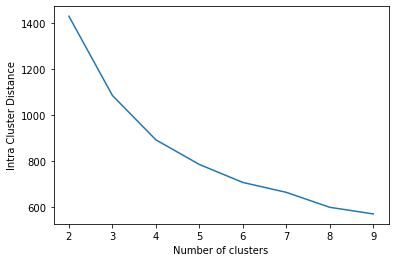

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#LAKAT METODA

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_normalizovan)
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()
plt.close()

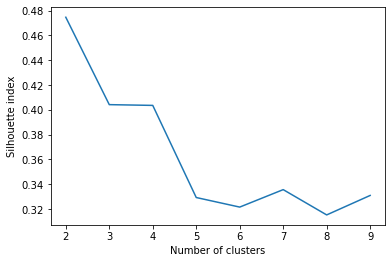

In [32]:
#SILHOUETTE INDEX

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_normalizovan)
    cluster_labels = kmeans.fit_predict(df_normalizovan)
    sse[k] = silhouette_score(df_normalizovan, cluster_labels)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette index")
plt.show()
plt.close()

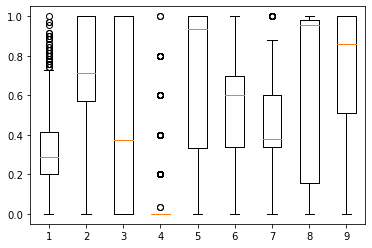

In [33]:
plt.boxplot(df_normalizovan)
plt.show()

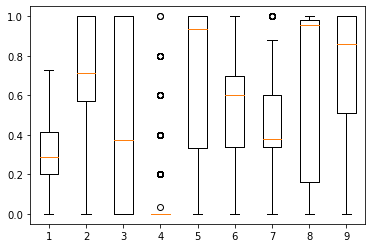

(3945, 31)

In [34]:
df_norm_out = df_normalizovan.loc[df_normalizovan['age']<0.74]
df_bonus = df_bonus.loc[df_bonus['age']<0.74]
df_bonus_sve = df_bonus_sve.loc[df_bonus_sve['age']<0.74]
plt.boxplot(df_norm_out)
plt.show()
df_bonus_sve.shape

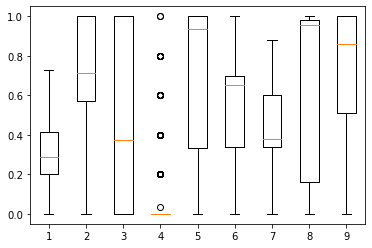

In [35]:
df_norm_out = df_norm_out.loc[df_norm_out['cons.conf.idx']<0.9]
df_bonus = df_bonus.loc[df_bonus['cons.conf.idx']<0.9]
df_bonus_sve = df_bonus_sve.loc[df_bonus_sve['cons.conf.idx']<0.9]
plt.boxplot(df_norm_out)
plt.show()

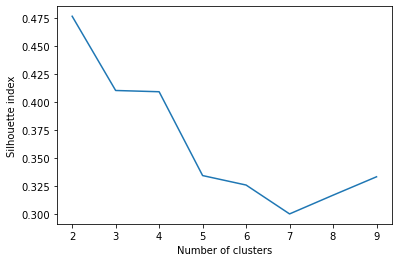

In [36]:
#SILHOUETTE SCORE df_norm_out

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_norm_out)
    cluster_labels = kmeans.fit_predict(df_norm_out)
    sse[k] = silhouette_score(df_norm_out, cluster_labels)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette index")
plt.show()
plt.close()

In [37]:
del df_norm_out['previous']

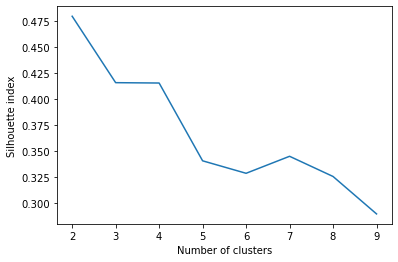

In [38]:
#SILHOUETTE SCORE df_norm_out

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_norm_out)
    cluster_labels = kmeans.fit_predict(df_norm_out)
    sse[k] = silhouette_score(df_norm_out, cluster_labels)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette index")
plt.show()
plt.close()

In [39]:
#Dodavanje u tabelu

kmeans_algorithm = KMeans(n_clusters = 2, max_iter=100)
cluster_model = kmeans_algorithm.fit(df_norm_out)
clusters = cluster_model.predict(df_norm_out)
df_norm_out['Cluster'] = clusters
df_norm_out.head(10)

,age,education,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Cluster
0,0.171429,0.571429,1.000000,0.333333,0.269680,0.192469,0.153741,0.512287,1
1,0.300000,0.714286,0.372333,0.937500,0.698753,0.602510,0.956916,0.859735,0
2,0.100000,0.714286,0.000000,1.000000,0.882307,0.376569,0.981179,1.000000,0
3,0.414286,1.000000,0.000000,0.687500,0.389322,0.368201,0.806349,0.877883,0
4,0.200000,1.000000,0.372333,0.479167,0.778644,0.556485,0.056463,0.000000,1
5,0.200000,1.000000,0.372333,0.479167,0.778644,0.556485,0.055329,0.000000,1
6,0.328571,1.000000,1.000000,0.687500,0.389322,0.368201,0.806349,0.877883,0
7,0.185714,0.857143,0.000000,0.687500,0.389322,0.368201,0.797732,0.877883,0
8,0.100000,0.428571,0.000000,1.000000,0.669135,0.338912,0.980272,1.000000,0
9,0.257143,0.285714,0.000000,1.000000,0.669135,0.338912,0.982540,1.000000,0


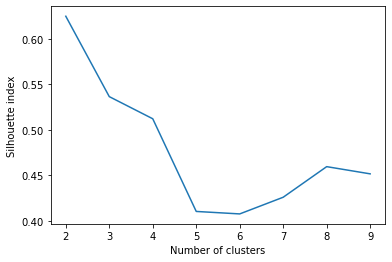

In [40]:
#Poboljsavanje silhouette index-a

del df_norm_out['education']

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_norm_out)
    cluster_labels = kmeans.fit_predict(df_norm_out)
    sse[k] = silhouette_score(df_norm_out, cluster_labels)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette index")
plt.show()
plt.close()

<function matplotlib.pyplot.show(close=None, block=None)>

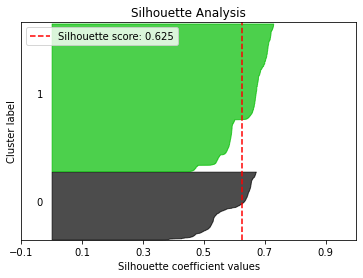

In [41]:
#!pip install scikit-plot
import scikitplot as skplt
kmeans = KMeans(n_clusters = 2, max_iter = 100).fit(df_norm_out)
cluster_labels = kmeans.fit_predict(df_norm_out)
skplt.metrics.plot_silhouette(df_norm_out, cluster_labels)
plt.show

In [42]:
#Update tabele

kmeans_algorithm = KMeans(n_clusters = 2, max_iter=100)
cluster_model = kmeans_algorithm.fit(df_norm_out)
clusters = cluster_model.predict(df_norm_out)
df_norm_out['Cluster'] = clusters
df_norm_out.head(10)

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Cluster
0,0.171429,1.000000,0.333333,0.269680,0.192469,0.153741,0.512287,1
1,0.300000,0.372333,0.937500,0.698753,0.602510,0.956916,0.859735,0
2,0.100000,0.000000,1.000000,0.882307,0.376569,0.981179,1.000000,0
3,0.414286,0.000000,0.687500,0.389322,0.368201,0.806349,0.877883,0
4,0.200000,0.372333,0.479167,0.778644,0.556485,0.056463,0.000000,1
5,0.200000,0.372333,0.479167,0.778644,0.556485,0.055329,0.000000,1
6,0.328571,1.000000,0.687500,0.389322,0.368201,0.806349,0.877883,0
7,0.185714,0.000000,0.687500,0.389322,0.368201,0.797732,0.877883,0
8,0.100000,0.000000,1.000000,0.669135,0.338912,0.980272,1.000000,0
9,0.257143,0.000000,1.000000,0.669135,0.338912,0.982540,1.000000,0


In [43]:
df_norm_out.to_csv('norm_out.csv')

In [44]:
#Uzimamo kolonu Cluster
df_cluster = df_norm_out['Cluster']

#Vracamo u DataFrame
df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = ['Cluster']

#Spajamo df_bonus/df_bonus_sve i df_cluster
df_bonus = pd.concat([df_bonus, df_cluster], axis=1)
df_bonus_sve = pd.concat([df_bonus_sve, df_cluster], axis=1)

In [45]:
#Extract csv fajla za bonus zadatak
df_bonus.to_csv('bonus.csv')
df_bonus_sve.to_csv('bonus_sve.csv')

In [46]:
#DataFrame za bonus zadatak
df_cluster_0 = df_bonus[df_bonus['Cluster'] == 0]
df_cluster_1 = df_bonus[df_bonus['Cluster'] == 1]

df_cluster_0_sve = df_bonus_sve[df_bonus_sve['Cluster'] == 0]
df_cluster_1_sve = df_bonus_sve[df_bonus_sve['Cluster'] == 1]

#Extract csv fajla za bonus zadatak
df_cluster_0.to_csv('cluster_0.csv')
df_cluster_1.to_csv('cluster_1.csv')

df_cluster_0_sve.to_csv('cluster_0_sve.csv')
df_cluster_1_sve.to_csv('cluster_1_sve.csv')

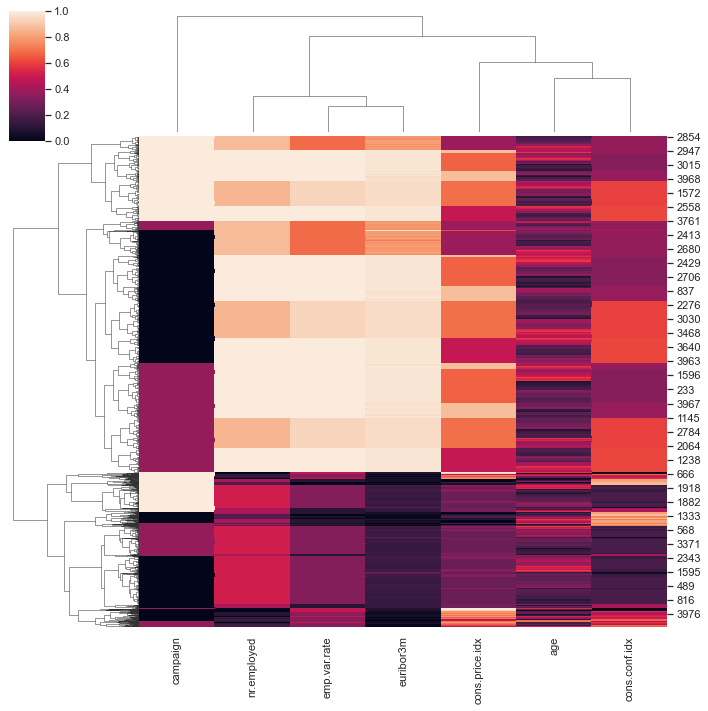

In [47]:
import seaborn as sns
sns.set(color_codes=True)
del df_norm_out['Cluster']
g = sns.clustermap(df_norm_out)